<a href="https://colab.research.google.com/github/Preeti-Yadav-CS1/gekko/blob/main/GEKKO_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRACTICAL 2

# 1: Solver selection
Solve y2=1 with APOPT(large scale optamization) solver. See APMonitor documentation(optimization software for mixed-integer and differential algebraic equations) or GEKKO documentation for additional solver options.

In [ ]:
from gekko import GEKKO
m = GEKKO()           # create GEKKO model
y = m.Var(value=2)    # define new variable, initial value=2
m.Equation(y**2==1)   # define new equation
m.options.SOLVER=1    # change solver (1=APOPT,3=IPOPT)
m.solve(disp=True)   # solve locally (remote=False)
print('y: ' + str(y.value)) # print variable value

apm 103.196.214.144_gk_model7 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            1
   Intermediates:            0
   Connections  :            0
   Equations    :            1
   Residuals    :            1
 
 Number of state variables:              1
 Number of total equations: -            1
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              0
 
 ----------------------------------------------
 Steady State Optimization with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  5.62500E-21  3.75000E-01
    1  5.06250E-22  1.40625E-01
    2  6.09849E-24  1.26562E-02


# 2: Linear Equations
3x+2y=1 and x+2y=0

In [ ]:
from gekko import GEKKO
m = GEKKO()            # create GEKKO model
x = m.Var()            # define new variable, default=0
y = m.Var()            # define new variable, default=0
m.Equations([3*x+2*y==1, x+2*y==0])  # equations
m.solve(disp=False)    # solve
print(x.value,y.value) # print solution

[0.5] [-0.25]


# 3: Solve Nonlinear Equations
x+2y=0
x2+y2=1

In [ ]:
m = GEKKO()             # create GEKKO model
x = m.Var(value=0)      # define new variable, initial value=0
y = m.Var(value=1)      # define new variable, initial value=1
m.Equations([x + 2*y==0, x**2+y**2==1]) # equations
m.solve(disp=False)     # solve
print([x.value[0],y.value[0]]) # print solution

[-0.89442724267, 0.44721362133]


# 4: Linear and Polynomial Regression

Text(0, 0.5, 'y')

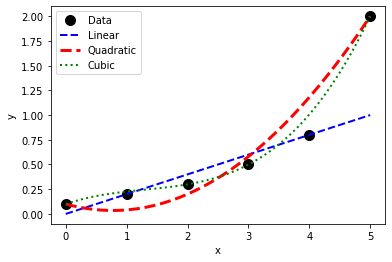

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

xm = np.array([0,1,2,3,4,5])
ym = np.array([0.1,0.2,0.3,0.5,0.8,2.0])

#### Solution
from gekko import Gekko
m = GEKKO()
m.options.IMODE=2
# coefficients
c = [m.FV(value=0) for i in range(4)]
x = m.Param(value=xm)
y = m.CV(value=ym)
y.FSTATUS = 1
# polynomial model
m.Equation(y==c[0]+c[1]*x+c[2]*x**2+c[3]*x**3)

# linear regression
c[0].STATUS=1
c[1].STATUS=1
m.solve(disp=False)
p1 = [c[1].value[0],c[0].value[0]]

# quadratic
c[2].STATUS=1
m.solve(disp=False)
p2 = [c[2].value[0],c[1].value[0],c[0].value[0]]

# cubic
c[3].STATUS=1
m.solve(disp=False)
p3 = [c[3].value[0],c[2].value[0],c[1].value[0],c[0].value[0]]

# plot fit
plt.plot(xm,ym,'ko',markersize=10)
xp = np.linspace(0,5,100)
plt.plot(xp,np.polyval(p1,xp),'b--',linewidth=2)
plt.plot(xp,np.polyval(p2,xp),'r--',linewidth=3)
plt.plot(xp,np.polyval(p3,xp),'g:',linewidth=2)
plt.legend(['Data','Linear','Quadratic','Cubic'],loc='best')
plt.xlabel('x')
plt.ylabel('y')

w1[0]: 1.080741831
w1[1]: 0.75667329922
w2a[0]: -0.027078572846
w2b[0]: 0.27741484924
w2a[1]: 0.86380100674
w2b[1]: 0.2642262989
w2a[2]: -0.92359576027
w2b[2]: 0.27181565974
w2a[3]: -1.8660517093
w2b[3]: 0.39707803555
w2a[4]: 0.37000097658
w2b[4]: 0.20243578122
w2a[5]: -2.2635578026
w2b[5]: 0.31743330489
w3[0]: 7.9923548396
w3[1]: 7.9923618485
w3[2]: -3.8520808977
w3[3]: -3.8514155231
w3[4]: -6.967266008
w3[5]: -6.9675296596


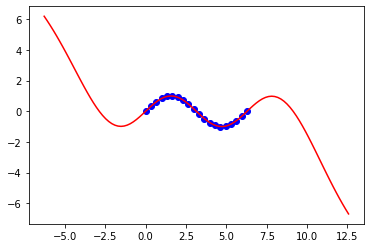

In [ ]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

# generate training data
x = np.linspace(0.0,2*np.pi,20)
y = np.sin(x)

# option for fitting function
select = False # True / False
if select:
    # Size with cosine function
    nin = 1  # inputs
    n1 = 1   # hidden layer 1 (linear)
    n2 = 1   # hidden layer 2 (nonlinear)
    n3 = 1  # hidden layer 3 (linear)
    nout = 1 # outputs
else:
    # Size with hyperbolic tangent function
    nin = 1  # inputs
    n1 = 2   # hidden layer 1 (linear)
    n2 = 3   # hidden layer 2 (nonlinear)
    n3 = 2   # hidden layer 3 (linear)
    nout = 1 # outputs

# Initialize gekko
train = GEKKO()
test = GEKKO()

model = [train,test]

for m in model:
    # input(s)
    m.inpt = m.Param()

    # layer 1
    m.w1 = m.Array(m.FV, (nin,n1))
    m.l1 = [m.Intermediate(m.w1[0,i]*m.inpt) for i in range(n1)]

    # layer 2
    m.w2a = m.Array(m.FV, (n1,n2))
    m.w2b = m.Array(m.FV, (n1,n2))
    if select:
        m.l2 = [m.Intermediate(sum([m.cos(m.w2a[j,i]+m.w2b[j,i]*m.l1[j]) \
                                for j in range(n1)])) for i in range(n2)]
    else:
        m.l2 = [m.Intermediate(sum([m.tanh(m.w2a[j,i]+m.w2b[j,i]*m.l1[j]) \
                                for j in range(n1)])) for i in range(n2)]

    # layer 3
    m.w3 = m.Array(m.FV, (n2,n3))
    m.l3 = [m.Intermediate(sum([m.w3[j,i]*m.l2[j] \
            for j in range(n2)])) for i in range(n3)]

    # output(s)
    m.outpt = m.CV()
    m.Equation(m.outpt==sum([m.l3[i] for i in range(n3)]))

    # flatten matrices
    m.w1 = m.w1.flatten()
    m.w2a = m.w2a.flatten()
    m.w2b = m.w2b.flatten()
    m.w3 = m.w3.flatten()

# Fit parameter weights
m = train
m.inpt.value=x
m.outpt.value=y
m.outpt.FSTATUS = 1
for i in range(len(m.w1)):
    m.w1[i].FSTATUS=1
    m.w1[i].STATUS=1
    m.w1[i].MEAS=1.0
for i in range(len(m.w2a)):
    m.w2a[i].STATUS=1
    m.w2b[i].STATUS=1
    m.w2a[i].FSTATUS=1
    m.w2b[i].FSTATUS=1
    m.w2a[i].MEAS=1.0
    m.w2b[i].MEAS=0.5
for i in range(len(m.w3)):
    m.w3[i].FSTATUS=1
    m.w3[i].STATUS=1
    m.w3[i].MEAS=1.0
m.options.IMODE = 2
m.options.SOLVER = 3
m.options.EV_TYPE = 2
m.solve(disp=False)

# Test sample points
m = test
for i in range(len(m.w1)):
    m.w1[i].MEAS=train.w1[i].NEWVAL
    m.w1[i].FSTATUS = 1
    print('w1['+str(i)+']: '+str(m.w1[i].MEAS))
for i in range(len(m.w2a)):
    m.w2a[i].MEAS=train.w2a[i].NEWVAL
    m.w2b[i].MEAS=train.w2b[i].NEWVAL
    m.w2a[i].FSTATUS = 1
    m.w2b[i].FSTATUS = 1
    print('w2a['+str(i)+']: '+str(m.w2a[i].MEAS))
    print('w2b['+str(i)+']: '+str(m.w2b[i].MEAS))
for i in range(len(m.w3)):
    m.w3[i].MEAS=train.w3[i].NEWVAL
    m.w3[i].FSTATUS = 1
    print('w3['+str(i)+']: '+str(m.w3[i].MEAS))
m.inpt.value=np.linspace(-2*np.pi,4*np.pi,100)
m.options.IMODE = 2
m.options.SOLVER = 3
m.solve(disp=False)

plt.figure()
plt.plot(x,y,'bo')
plt.plot(test.inpt.value,test.outpt.value,'r-')
plt.show()